In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import ascii
import celerite
from astropy import units as u
from astropy import constants as const
from scipy.optimize import curve_fit
import glob
import pandas as pd

In [3]:
def Gauss(x, height, center, width):
    y = height*np.exp(-(x-center)**2/(2*width**2))
    return y

C:\Users\seven\AppData\Local\Temp\ipykernel_7192\925926689.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


                                        HI Integrals
0  [328.86912000000024, 679.1846400000006, 109.81...
                                   HI Integral Error
0  [26.087346834939087, 32.00114326387237, 11.412...
                                     HI Signal Noise
0  [12.606460982055177, 21.223761738749026, 9.621...
                                           HI Height  \
0  [28.026203991591498, 25.963354116634935, 3.722...   

                                  HI Center Velocity  \
0  [-4.774547021275042, -7.092728200222919, -0.18...   

                                            HI Width  
0  [-2.794628172775015, 8.563332761896294, 6.8722...  


NameError: name 'HILatLon' is not defined

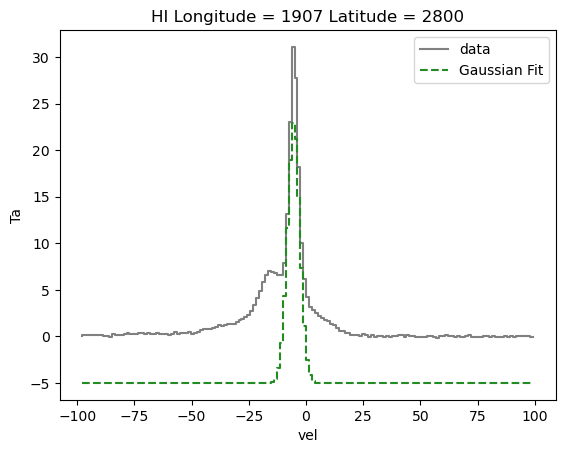

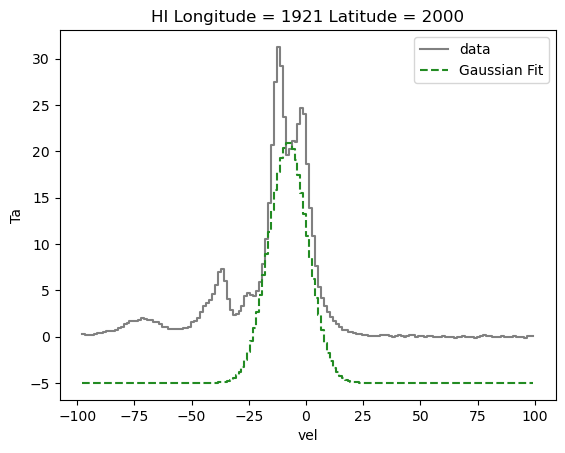

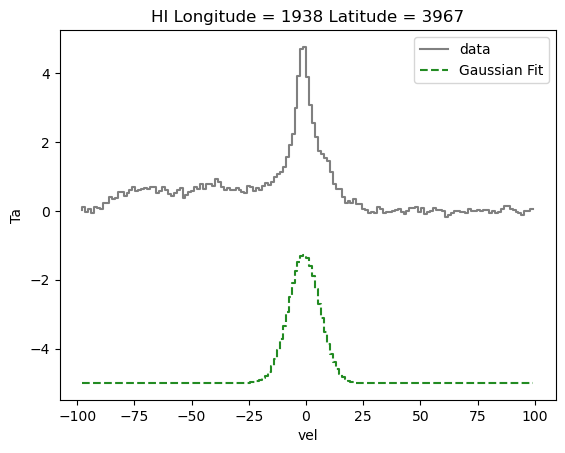

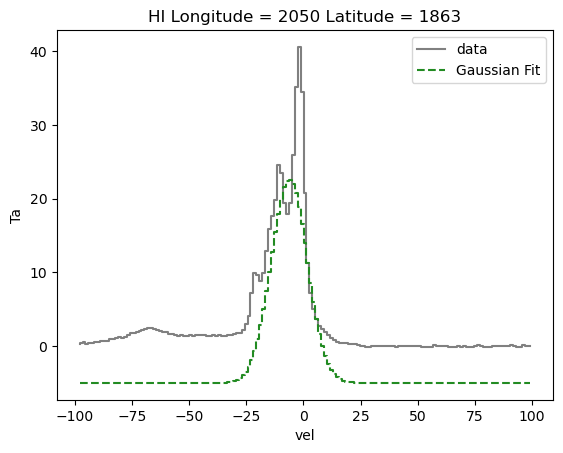

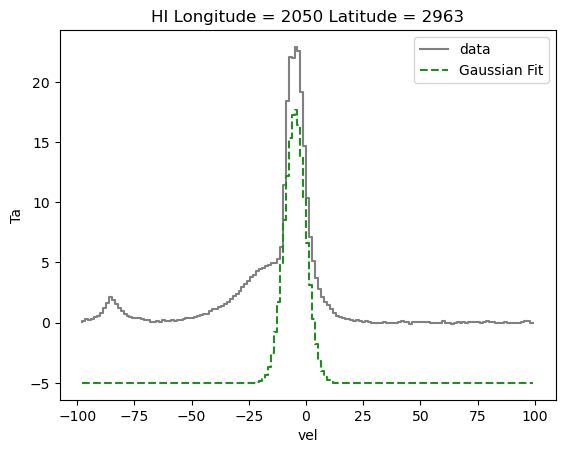

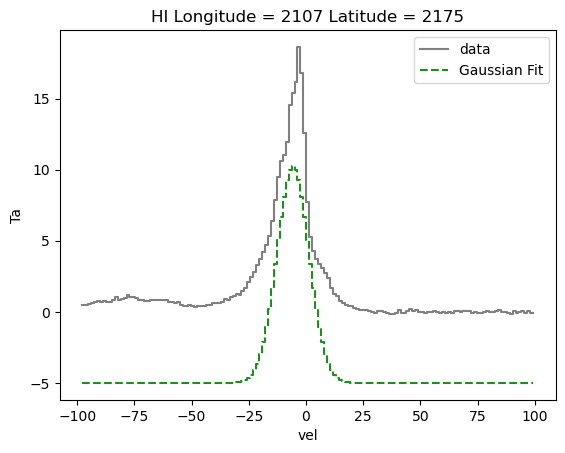

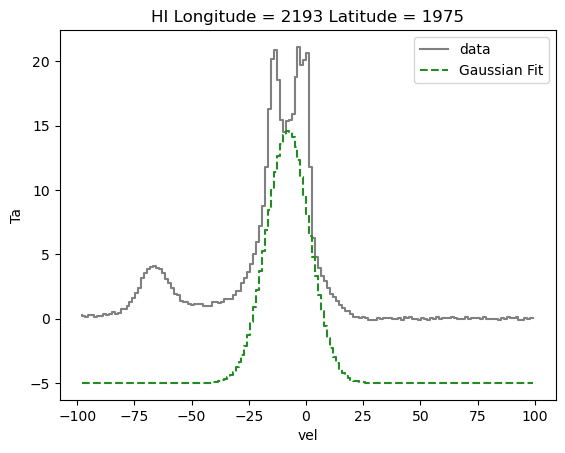

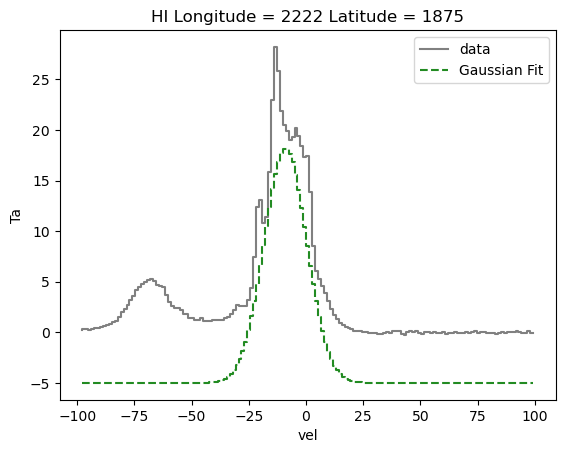

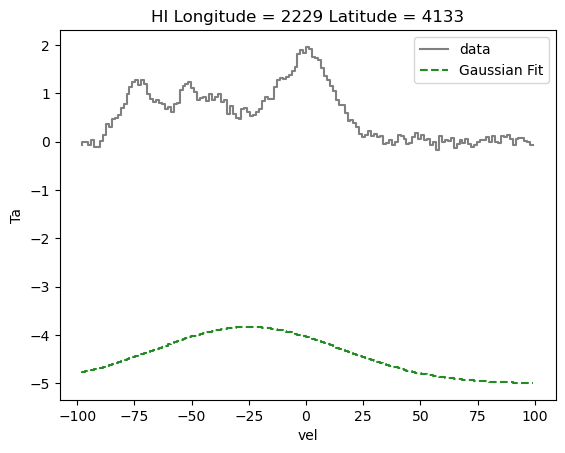

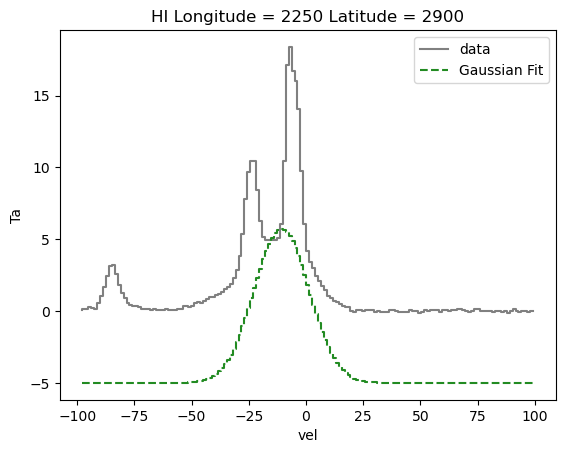

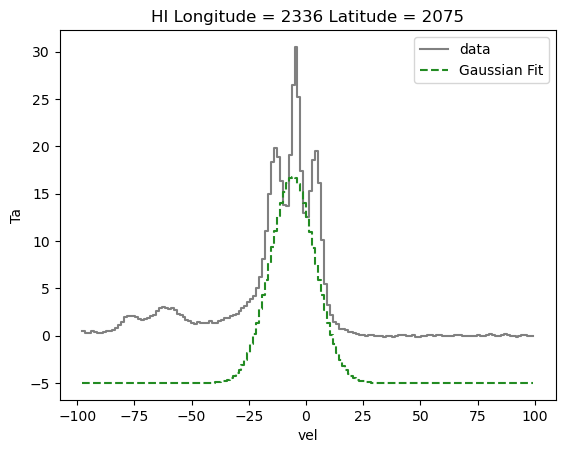

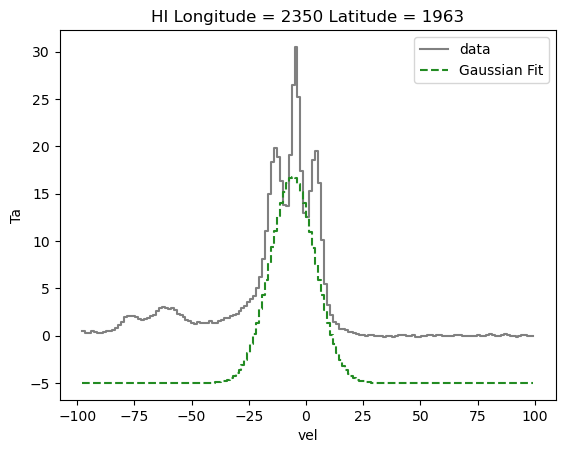

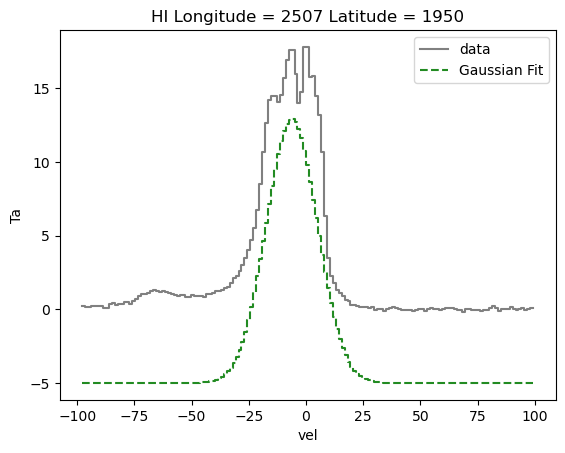

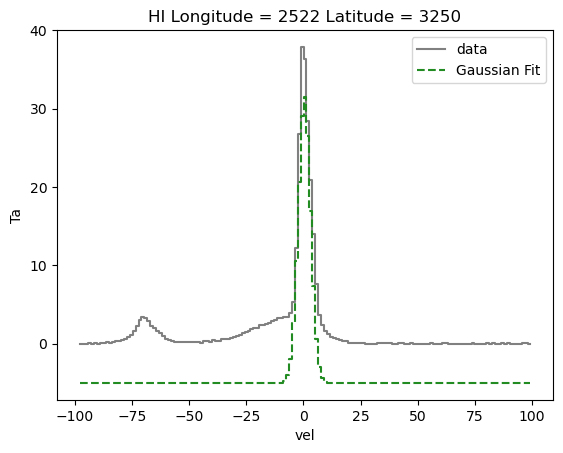

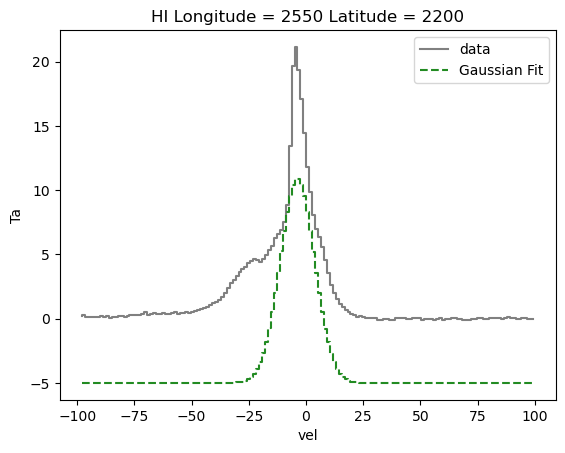

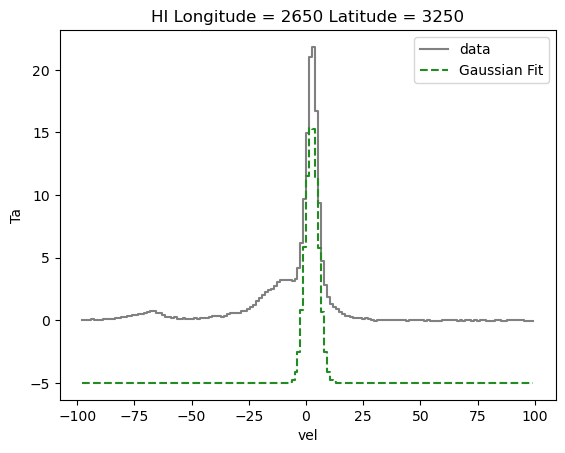

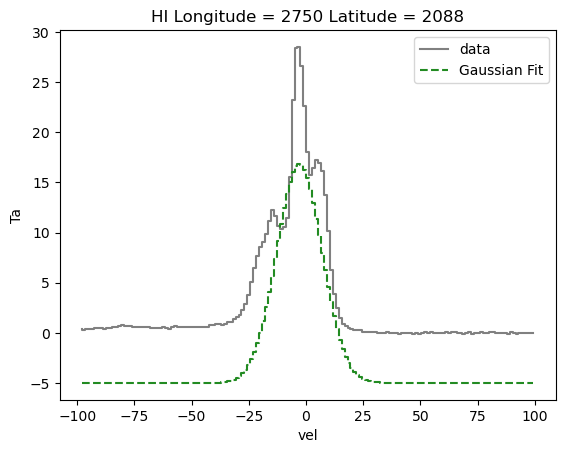

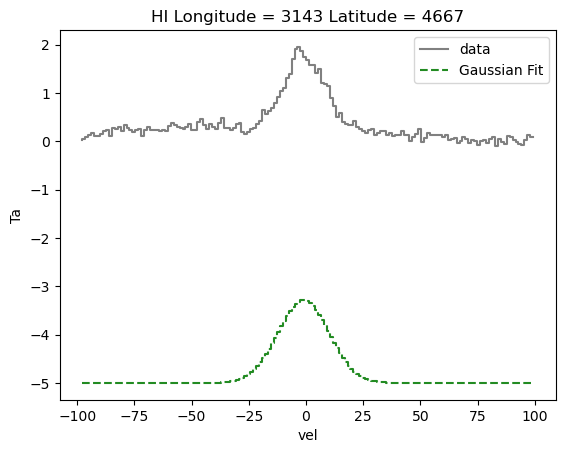

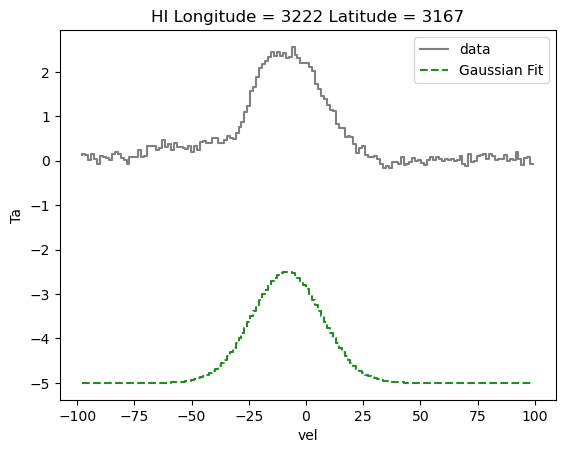

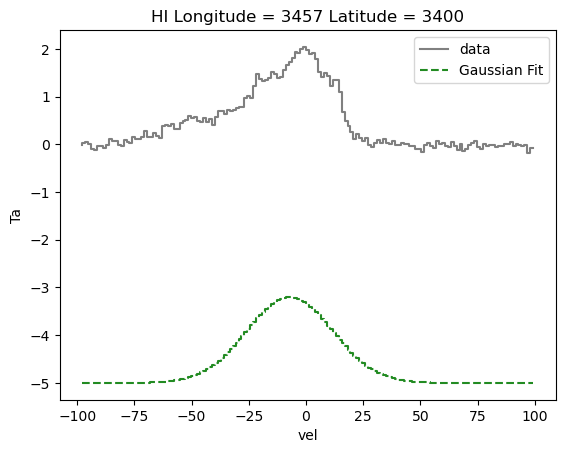

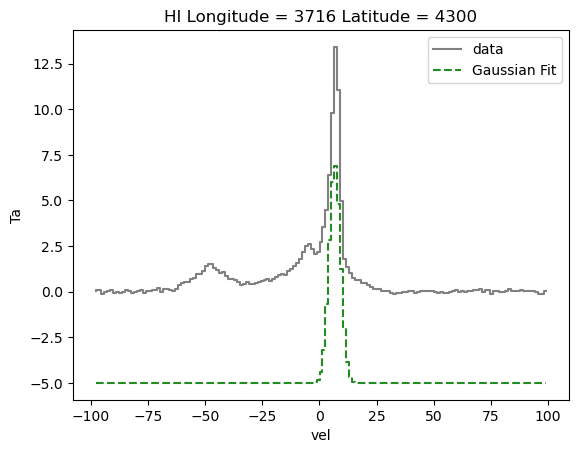

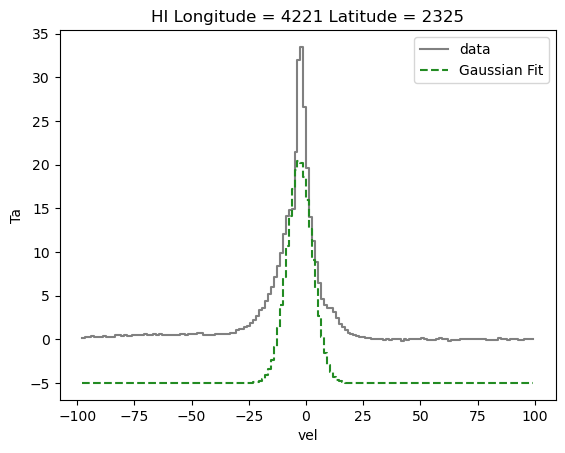

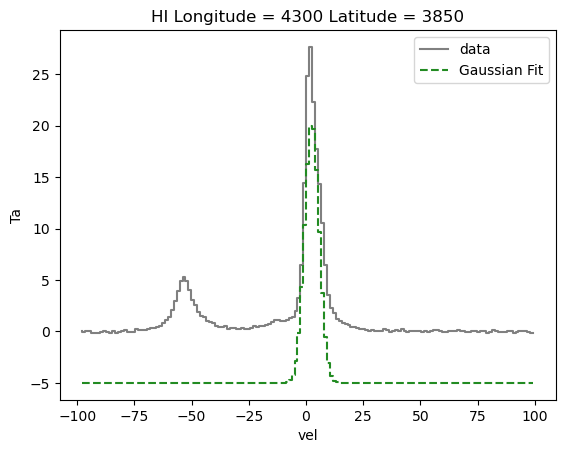

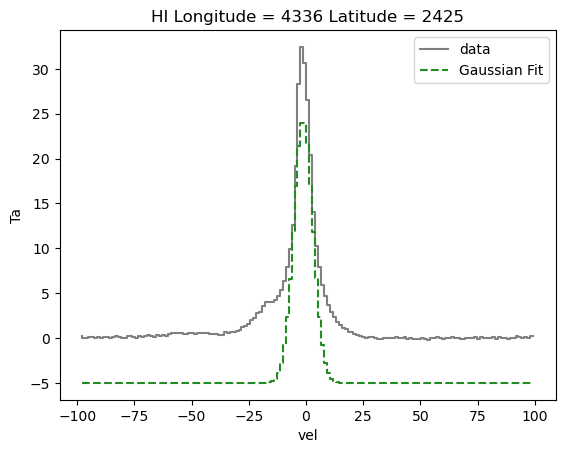

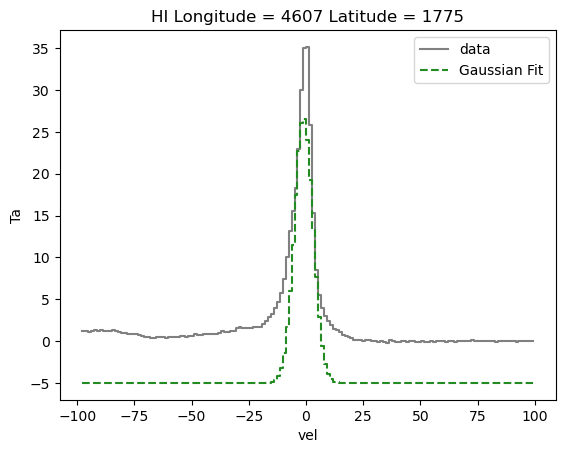

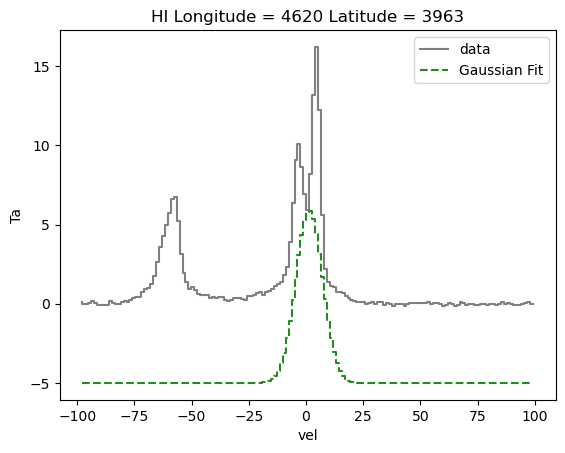

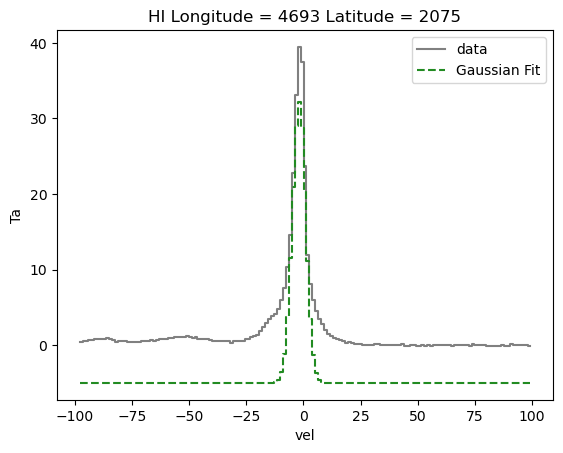

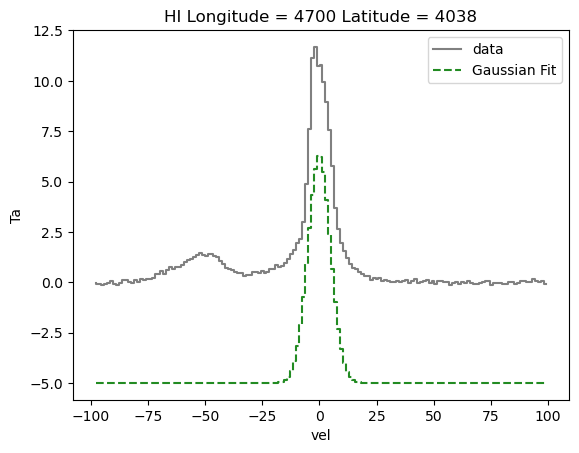

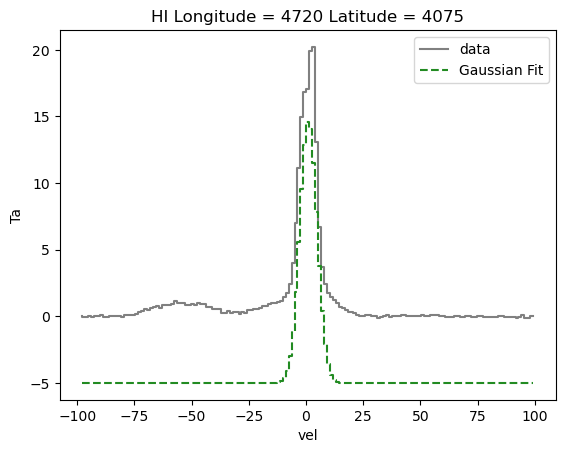

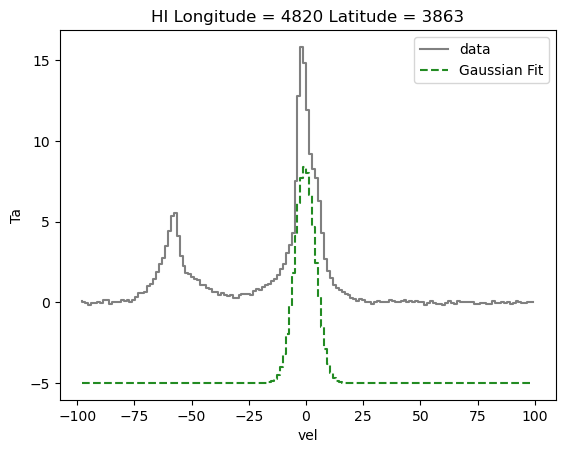

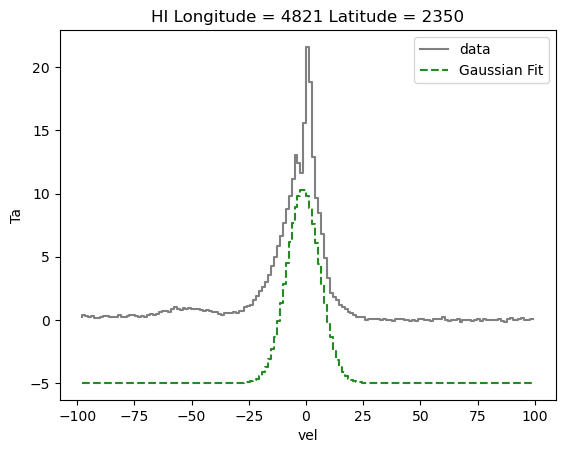

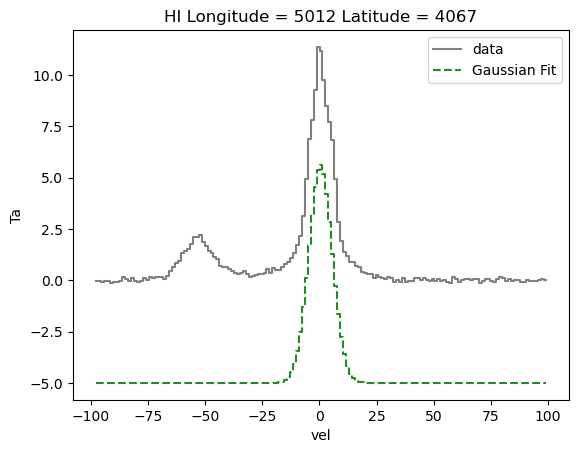

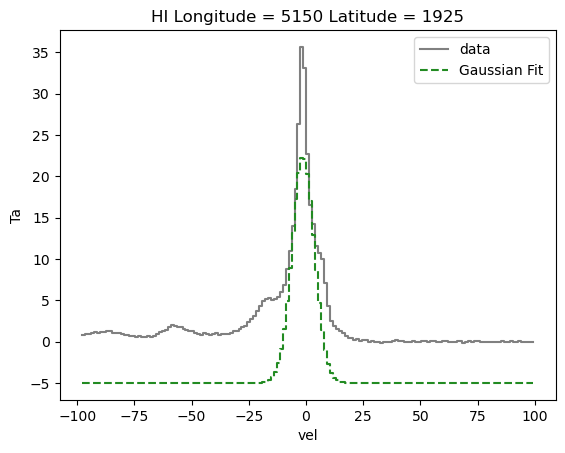

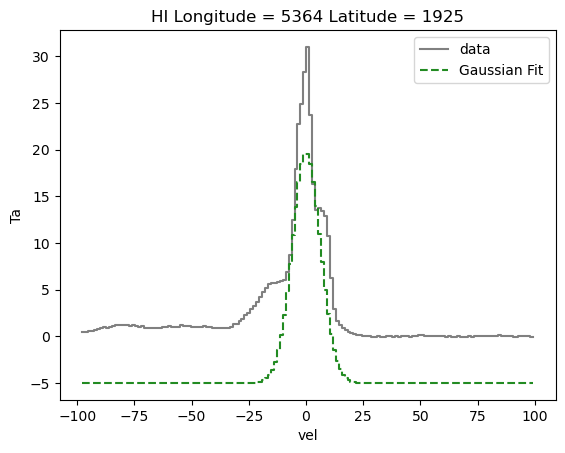

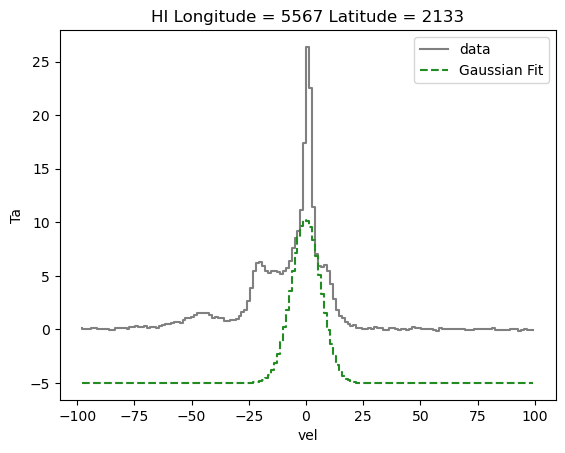

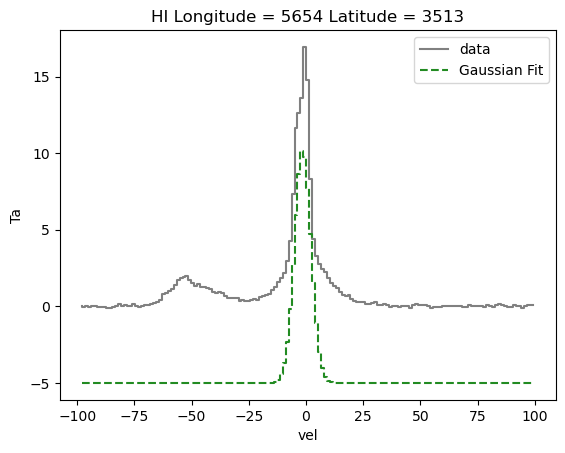

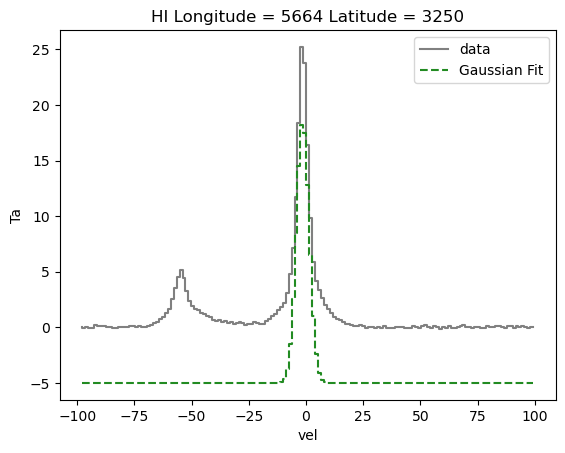

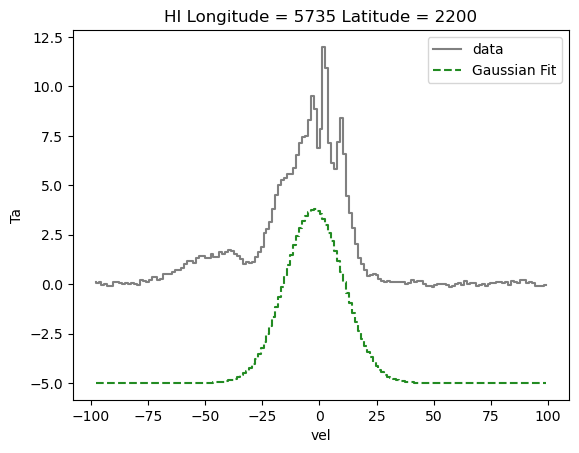

In [6]:
#HI Data For Loop:
aList = []
bList = []
cList = []
intList = []
intErrList = []
SigNoiseList = []
lonlist = []
latlist = []

datafiles = glob.glob("C:/Users/seven/OneDrive/Documents/HI Data/*.txt*")

for data in datafiles:
    HIdata = ascii.read(data, data_start = 13, data_end = 167) #data is a singular pathname, datafiles is array of pathnames
    vel = HIdata['col1']
    Ta = HIdata['col2']
    
    #Galactic Range Choice:
    igood = np.where((vel >= -100) & (vel <=100))
    
    #Select Galactic Range:
    vel = vel[igood]
    Ta = Ta[igood]
    
    #Begin with Single Gaussian Fit
    parameters, covariance = curve_fit(Gauss, vel, Ta, p0=[0.03, 0, 4])
    fitA = parameters[0]
    fitB = parameters[1]
    fitC = parameters[2]
    fit_y = Gauss(vel, fitA, fitB, fitC)
    
    #lon and lat
    #print('Latitude', data[51:55])
    lat = int(data[51:55])
    latlist.append(lat)
    #print('Longitude:', data[45:49])
    lon = int(data[45:49])
    lonlist.append(lon)    
    
    #plotting
    plt.figure()
    #fig, axs = plt.subplots(4, 4)
    plt.step(vel, Ta, 'grey', label = 'data')
    plt.step(vel, fit_y-5, 'forestgreen',ls = 'dashed', label = 'Gaussian Fit')
    plt.legend()
    plt.xlabel('vel')
    plt.ylabel('Ta')
    plt.title('HI Longitude = ' +str(lon)+ " Latitude = " +str(lat))
    
    
    #integration
    integral = np.sum(Ta[igood])*(vel[1]-vel[0])
    intList.append(integral)
    
    #integral error
    err = np.sqrt(len(vel[igood])*np.std(Ta[igood]))
    intErrList.append(err)
    
    #noise
    SigNoise = integral/err
    SigNoiseList.append(SigNoise)
    
    #Parameters
    a = parameters[0]
    aList.append(a)
    b = parameters[1]
    bList.append(b)
    c = parameters[2]
    cList.append(c)
    
    #pandas dataframe reorganization
    HILat = pd.DataFrame({'HI Latitude': [latlist]})
    HILon = pd.DataFrame({'HI Longitude': [lonlist]})
    HIIntdf = pd.DataFrame({'HI Integrals': [intList]})
    HIIntErrdf = pd.DataFrame({'HI Integral Error': [intErrList]})
    HISigNoisedf = pd.DataFrame({'HI Signal Noise': [SigNoiseList]})
    HIParamdf = pd.DataFrame({'HI Height': [aList], 'HI Center Velocity': [bList], 'HI Width': [cList]})


    
#Plotting Integrals and Center Velocity
#plt.figure()
#plt.scatter(cList, intList)
#plt.ylabel("W (HI) (K km/s)")
#plt.xlabel("Width (km/s)")


#PRINTING: Not indented so we print the complete array, instead of cycling through incomplete ones due to for loop.
#print('Integrals:', intList)
#print('Integral Error:', intErrList)
#print('Signal Noise:', SigNoiseList)

#Parameter Printing
#print('Height:', aList)
#print('Center Velocity:', bList)
#print('Width:', cList)

#pandas dataframe reorganization
#HILatLon = pd.DataFrame({'HI Latitude': [lat], 'HI Longitude': [lon]})
#HIIntdf = pd.DataFrame({'HI Integrals': [intList]})
#HIIntErrdf = pd.DataFrame({'HI Integral Error': [intErrList]})
#HISigNoisedf = pd.DataFrame({'HI Signal Noise': [SigNoiseList]})
#HIParamdf = pd.DataFrame({'HI Height': [aList], 'HI Center Velocity': [bList], 'HI Width': [cList]})
#print(HILatLon)
print(HIIntdf)
print(HIIntErrdf)
print(HISigNoisedf)
print(HIParamdf)

#pandas dataframe, save as pickle file .pkl
HILatLon.to_pickle("HILatLon.pkl")
HIIntdf.to_pickle("HIIntdf.pkl")
HIIntErrdf.to_pickle("HIIntErrdf.pkl")
HISigNoisedf.to_pickle("HISigNoisedf.pkl")
HIParamdf.to_pickle("HIParam.df.pkl")

In [ ]:
print(HILat.info())

In [ ]:
HILon["HI Longitude"][0][0]

In [ ]:
HIParamdf.info()

In [ ]:
HIParamdf["HI Height"][0]

In [35]:
HIParamdf["HI Width"][0]

[-2.794628172775015,
 8.563332761896294,
 6.872241628724851,
 7.8719270032146,
 -4.735087977470133,
 7.037633487528728,
 -9.47024412894369,
 -9.323009096371388,
 40.483816907280875,
 11.996840697295069,
 9.849267866270448,
 9.849267866270448,
 11.126036165275927,
 -2.7757527082639584,
 7.516178941424814,
 2.8054033336711335,
 9.86877947295289,
 11.229004332519725,
 15.268183238633451,
 18.814934838252015,
 -2.5107599389855824,
 5.592515594086242,
 3.144571754063366,
 -4.260450350554422,
 4.1186686121191896,
 5.87805619070324,
 3.0143487234009703,
 4.992619996138879,
 3.7822231105949715,
 4.60279645122033,
 7.2130208722663784,
 5.192776731019211,
 4.941644752048448,
 6.212653968773734,
 -6.509194001835868,
 3.658978301223421,
 2.8614442280360053,
 12.684427079081422]

In [36]:
HIParamdf["HI Center Velocity"][0]

[-4.774547021275042,
 -7.092728200222919,
 -0.18042831246916974,
 -5.419645850584315,
 -4.095127535163895,
 -5.053578600117499,
 -7.167022425539699,
 -8.30283935433247,
 -24.30780213282077,
 -9.966952618310772,
 -5.073073524656433,
 -5.073073524656433,
 -5.532114968088472,
 1.1527460088351396,
 -3.129234263808031,
 3.3031309078870343,
 -2.2546782575678646,
 -0.45321940955486767,
 -7.609723657677963,
 -6.444068769407186,
 7.550806891231142,
 -2.1116976015393227,
 3.250045743709353,
 -0.5311687533768765,
 -0.34204519306554027,
 2.048339535721713,
 -1.210937918426668,
 0.6431362418600091,
 1.7429078010684396,
 0.27985009349633533,
 -0.5776679955381707,
 1.221582953335368,
 -0.5733072596643036,
 0.7726366949497601,
 0.6376734090033139,
 -0.7891300169787319,
 -0.7429465106152667,
 -1.574123101675049]